In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')
sns.set(font_scale=2.5)

# 데이터셋에 채워지지 않은 Null 데이터를 쉽게 보여줄 수 있는 라이브러리
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')


In [3]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent Of NAN Value: {:.3f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent Of NAN Value: 0.000%
column:   Survived	 Percent Of NAN Value: 0.000%
column:     Pclass	 Percent Of NAN Value: 0.000%
column:       Name	 Percent Of NAN Value: 0.000%
column:        Sex	 Percent Of NAN Value: 0.000%
column:        Age	 Percent Of NAN Value: 19.865%
column:      SibSp	 Percent Of NAN Value: 0.000%
column:      Parch	 Percent Of NAN Value: 0.000%
column:     Ticket	 Percent Of NAN Value: 0.000%
column:       Fare	 Percent Of NAN Value: 0.000%
column:      Cabin	 Percent Of NAN Value: 77.104%
column:   Embarked	 Percent Of NAN Value: 0.224%


In [4]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent Of NAN Value: {:.3f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent Of NAN Value: 0.000%
column:     Pclass	 Percent Of NAN Value: 0.000%
column:       Name	 Percent Of NAN Value: 0.000%
column:        Sex	 Percent Of NAN Value: 0.000%
column:        Age	 Percent Of NAN Value: 20.574%
column:      SibSp	 Percent Of NAN Value: 0.000%
column:      Parch	 Percent Of NAN Value: 0.000%
column:     Ticket	 Percent Of NAN Value: 0.000%
column:       Fare	 Percent Of NAN Value: 0.239%
column:      Cabin	 Percent Of NAN Value: 78.230%
column:   Embarked	 Percent Of NAN Value: 0.000%


In [5]:
df_train.iloc[:,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


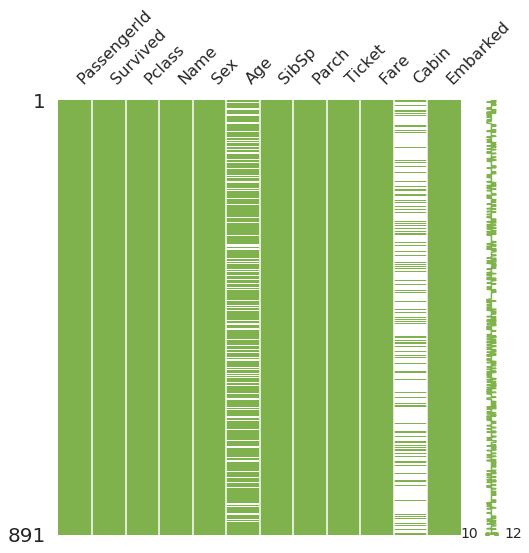

In [6]:
msno.matrix(df_train.iloc[:,:], figsize=(8,8), color=(0.5, 0.7, 0.3))

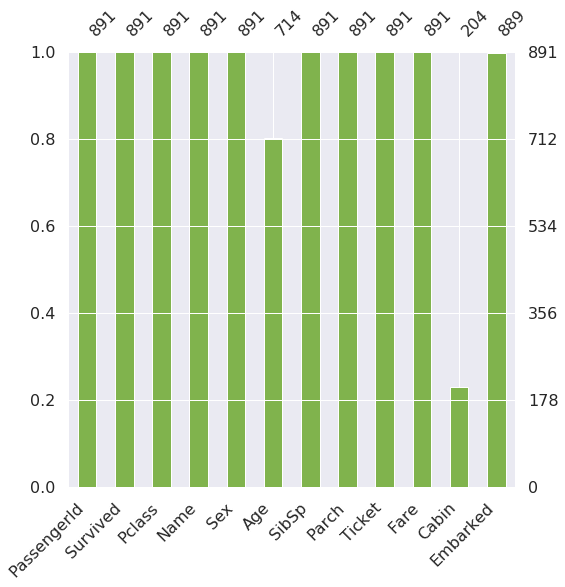

In [7]:
msno.bar(df_train.iloc[:,:], figsize=(8,8), color=(0.5, 0.7, 0.3))

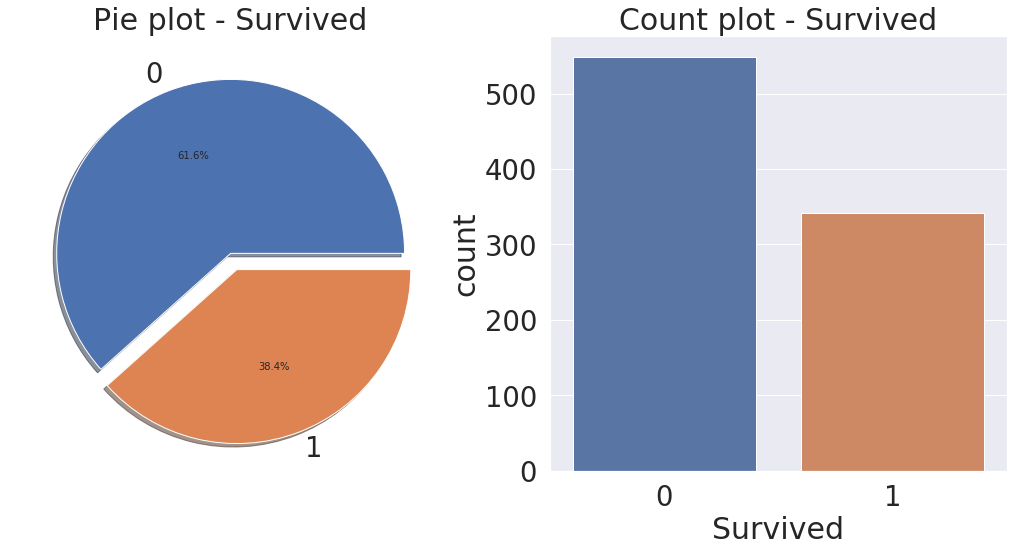

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [9]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()


,Survived
Pclass,
1,216
2,184
3,491


In [10]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()


,Survived
Pclass,
1,136
2,87
3,119


In [11]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


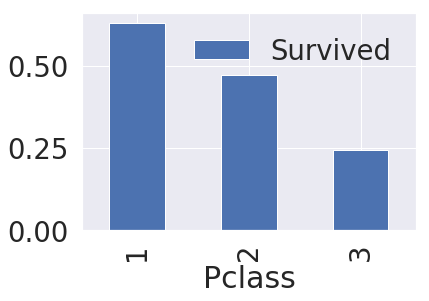

In [12]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

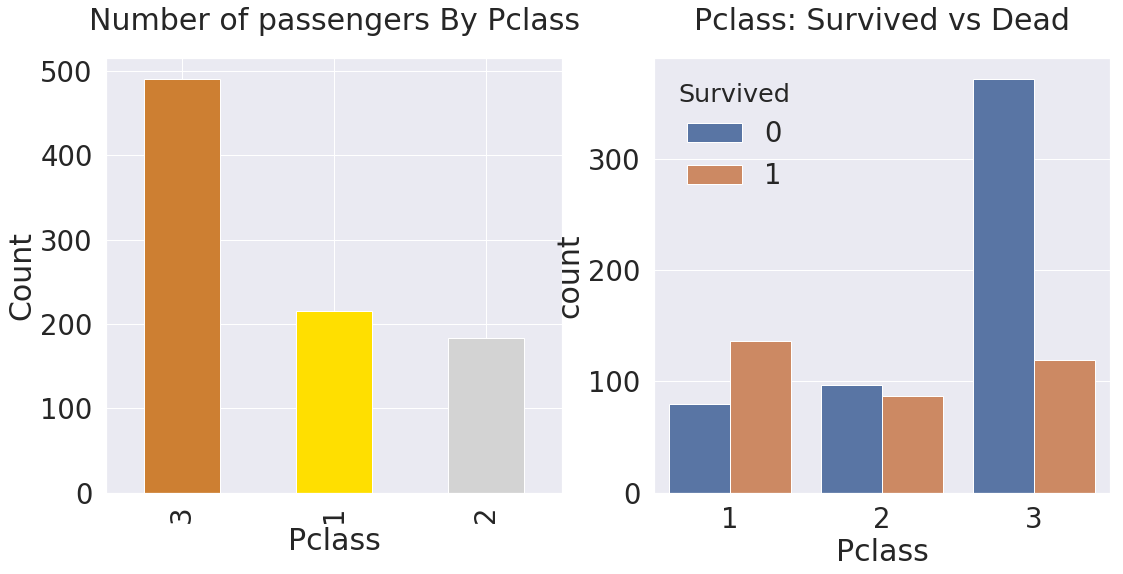

In [13]:
y_position=1.05
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Pclass')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

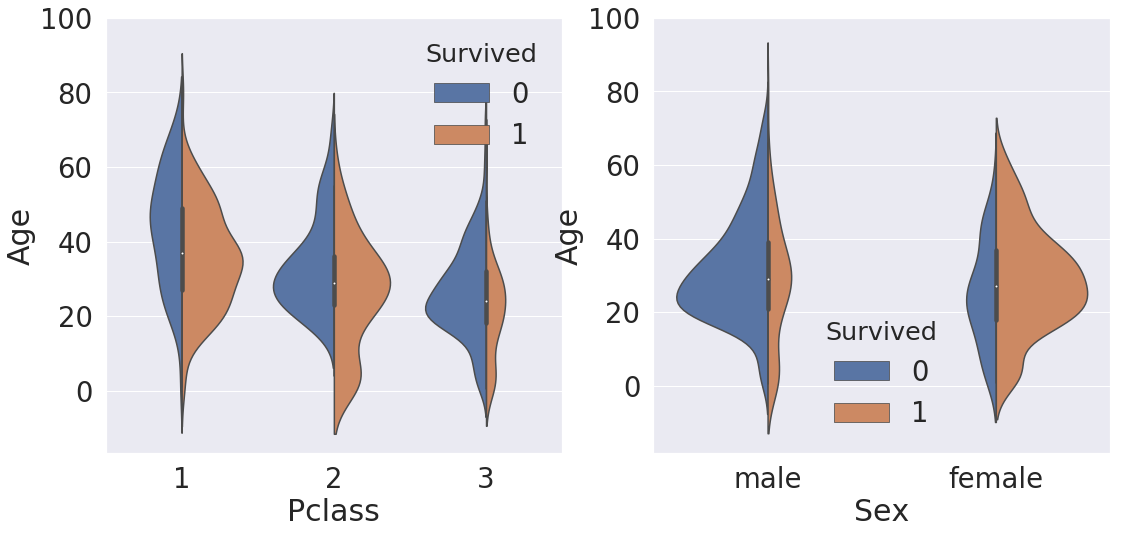

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=df_train,scale='count',split=True, ax=ax[0])
ax[0].set_title=('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,20))
sns.violinplot('Sex','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title=('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,20))
plt.show()

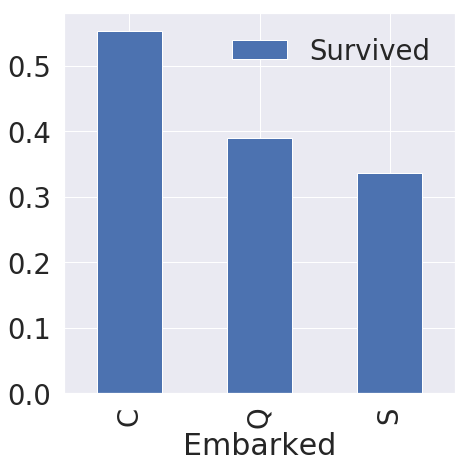

In [15]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)


In [16]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


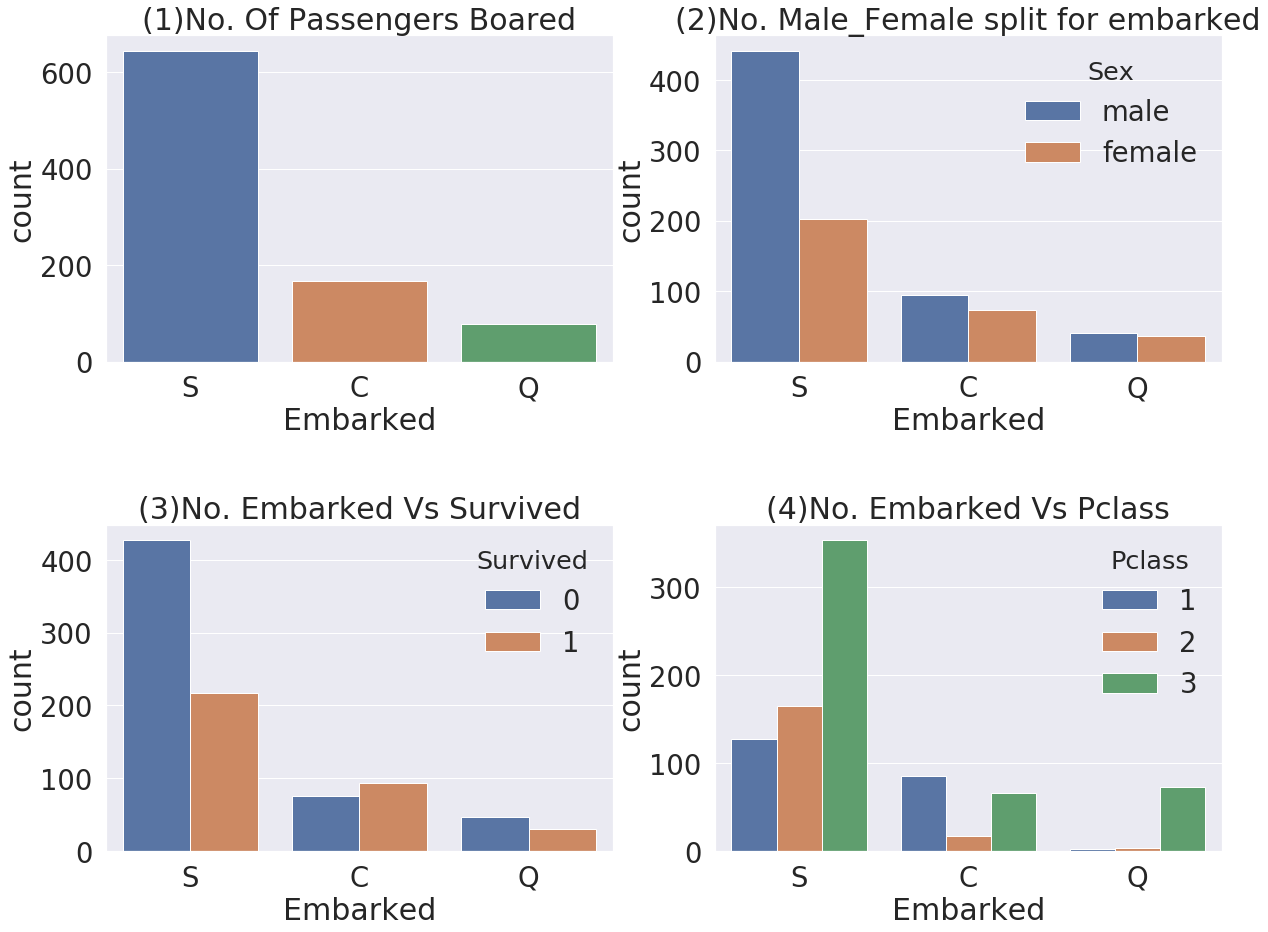

In [17]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1)No. Of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2)No. Male_Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3)No. Embarked Vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4)No. Embarked Vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [19]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['FamilySize']

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: FamilySize, Length: 418, dtype: int64

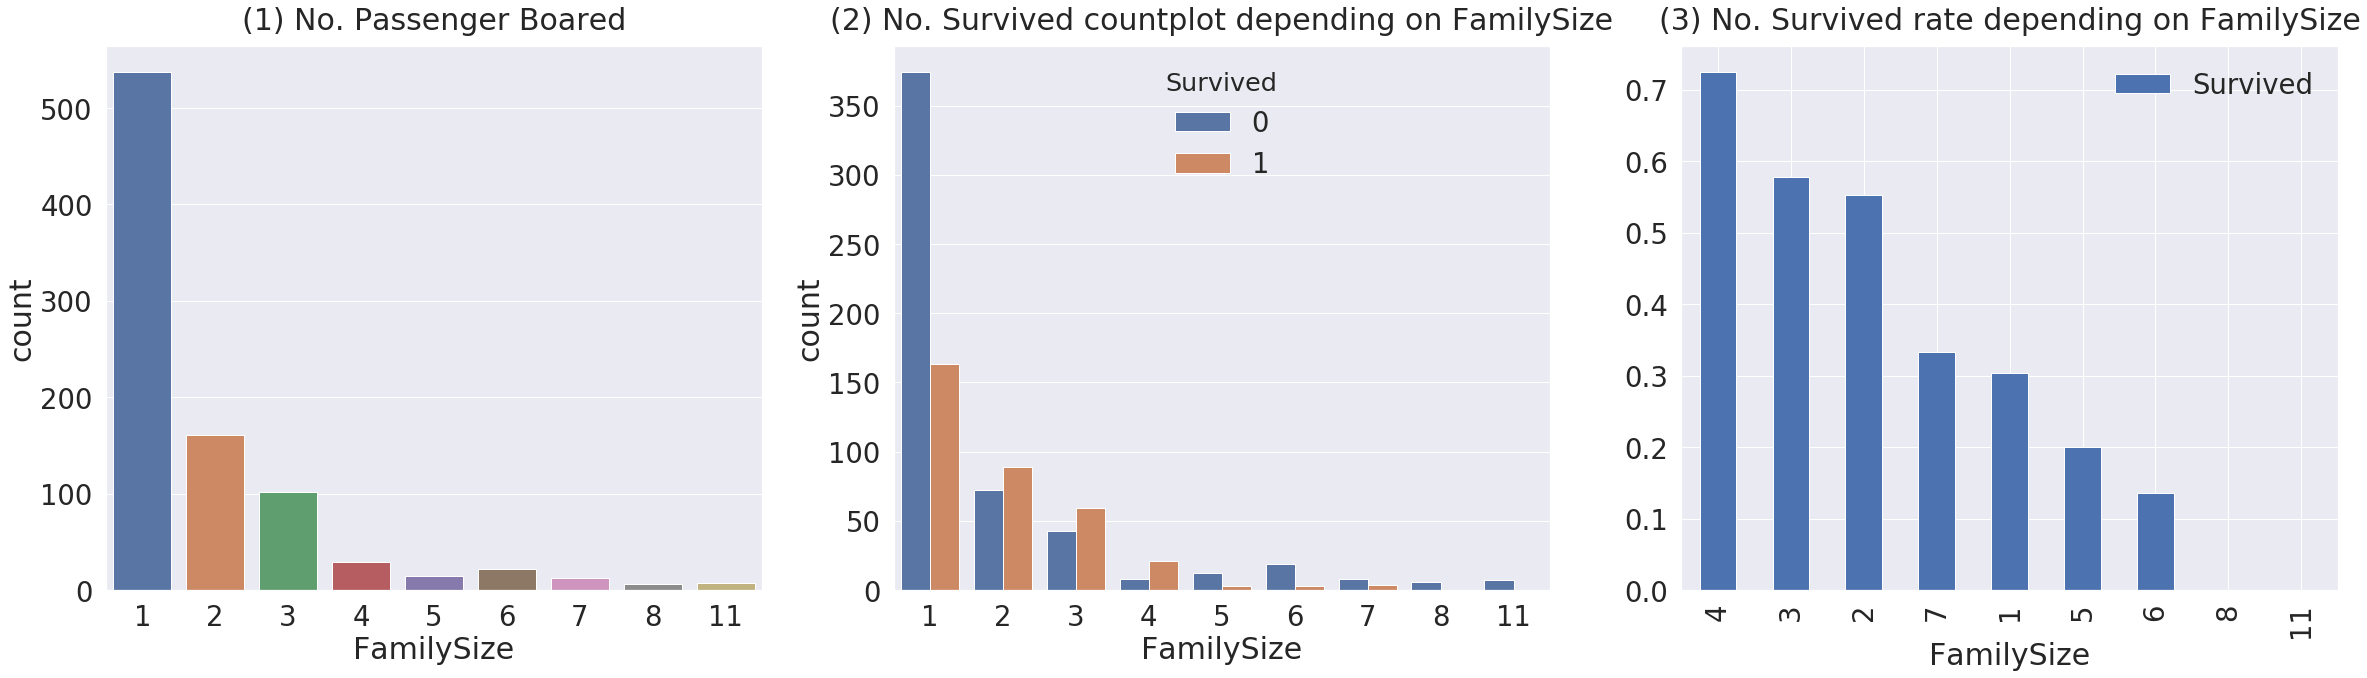

In [20]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Passenger Boared', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) No. Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(['Survived'], ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) No. Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=.05)
plt.show()

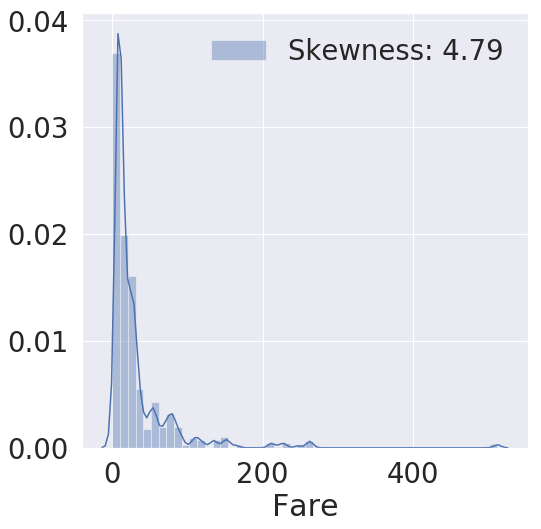

In [21]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax) 
g = g.legend(loc='best')

In [22]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

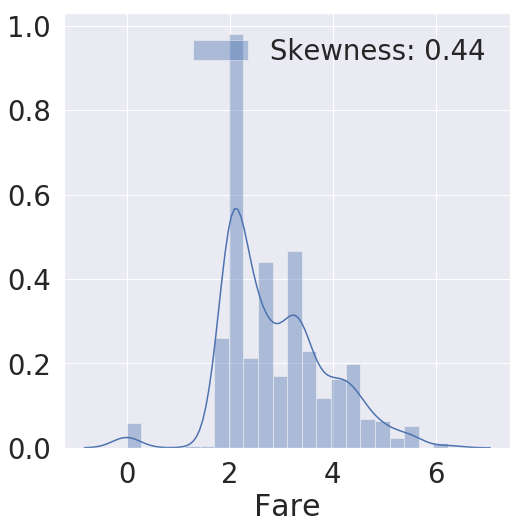

In [23]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax) 
g = g.legend(loc='best')

In [24]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
349910      1
347089      1
347062      1
29103       1
250648      1
Name: Ticket, Length: 681, dtype: int64

In [25]:
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [26]:
df_train['initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Countess      1
Sir           1
Ms            1
Capt          1
Mme           1
Don           1
Jonkheer      1
Name: initial, dtype: int64

In [27]:
 df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [28]:
pd.crosstab(df_train['initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [29]:
df_train['initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)
df_test['initial'].replace(['Mile','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [30]:
df_train.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,408.864130,0.701087,2.298913,21.831081,0.706522,0.543478,3.113425,2.250000
Mlle,676.500000,1.000000,1.000000,24.000000,0.000000,0.000000,4.070251,1.000000
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


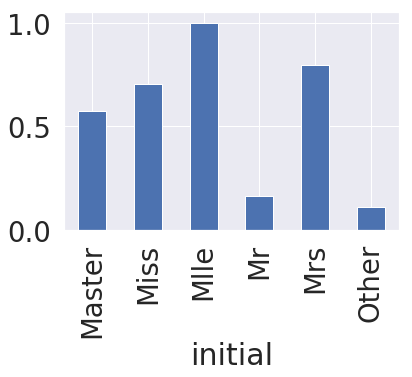

In [31]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [32]:
df_all=pd.concat([df_train,df_test])

In [33]:
df_all.reset_index(drop=True)

,Age,Cabin,Embarked,FamilySize,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,initial
0,22.0,NaN,S,2,1.981001,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,2,4.266662,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,1,2.070022,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,2,3.972177,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,1,2.085672,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,1,8.050000,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
1305,39.0,C105,C,1,108.900000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Mr
1306,38.5,NaN,S,1,7.250000,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
1307,NaN,NaN,S,1,8.050000,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr


In [34]:
df_all.groupby('initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
initial,,,,,,,,
Master,5.482642,4.426230,15.442677,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.814104,2.155894,14.096861,0.498099,616.539924,2.342205,0.657795,0.701087
Mlle,24.000000,1.000000,4.070251,0.000000,676.500000,1.000000,0.000000,1.000000
Mr,32.556397,1.446174,10.003941,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,23.896996,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,24.523034,0.153846,714.923077,1.615385,0.230769,0.111111


In [35]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] =='Mr'), 'Age'] = 33

In [36]:
df_all.groupby('initial').mean()

,Age,FamilySize,Fare,Parch,PassengerId,Pclass,SibSp,Survived
initial,,,,,,,,
Master,5.482642,4.426230,15.442677,1.377049,658.852459,2.655738,2.049180,0.575000
Miss,21.814104,2.155894,14.096861,0.498099,616.539924,2.342205,0.657795,0.701087
Mlle,24.000000,1.000000,4.070251,0.000000,676.500000,1.000000,0.000000,1.000000
Mr,32.556397,1.446174,10.003941,0.159533,658.831388,2.359274,0.286641,0.162571
Mrs,37.034884,2.482412,23.896996,0.824121,685.673367,1.929648,0.658291,0.795276
Other,44.923077,1.384615,24.523034,0.153846,714.923077,1.615385,0.230769,0.111111


In [37]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] =='Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] =='Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] =='Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] =='Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial'] =='Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] =='Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] =='Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] =='Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] =='Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial'] =='Other'), 'Age'] = 45

In [38]:
df_train['Age'].isnull().sum()
df_test['Age'].isnull().sum()

0

In [39]:
print(df_train.Embarked.isnull().sum())
df_train.shape

2


(891, 14)

In [40]:
df_train['Embarked'].fillna('S', inplace=True)

In [41]:
df_test['Fare'].fillna('7.8292', inplace=True)

In [42]:
df_train.Embarked.isnull().sum()

0

In [43]:
df_test.Fare.isnull().sum()

0

In [44]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [45]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [46]:
df_train['Age'].apply(category_age)

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age, Length: 891, dtype: int64

In [47]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [48]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [49]:
df_train.drop(['Age','Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [50]:
df_test['Age_cat'] = df_train['Age_cat']

In [51]:
df_train['initial'] = df_train['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [52]:
df_test['initial'] = df_test['initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [53]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [54]:
df_train.Sex = df_train.Sex.map({'female':0, 'male':1})
df_test.Sex = df_test.Sex.map({'female':0, 'male':1})

In [55]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','initial','Age_cat']]

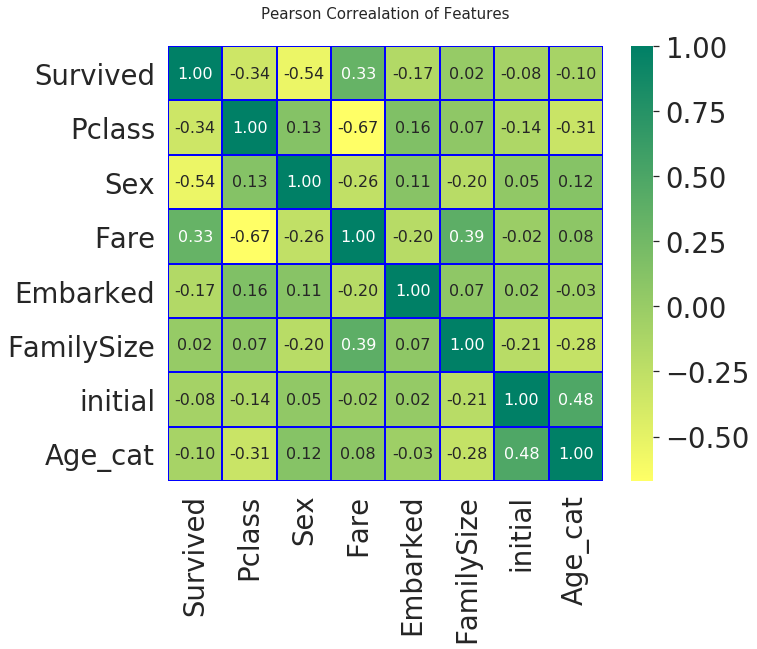

In [56]:
colormap = plt.cm.summer_r
plt.figure(figsize=(10,8))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=1, vmax=1,
            square=True, cmap=colormap, linecolor='Blue', annot=True, annot_kws={'size':16}, fmt='.2f')

In [57]:
df_train=pd.get_dummies(df_train, columns=['initial'], prefix='initial')
df_test=pd.get_dummies(df_test, columns=['initial'], prefix='initial')

In [58]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [59]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [60]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0.0,initial_1.0,initial_2.0,initial_3.0,initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2.0,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3.0,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2.0,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3.0,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3.0,0,0,1,0,0,0,0,1


In [61]:
x_train =  df_train.drop('Survived', axis=1 ).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [62]:
x_tr, x_vid, y_tr, y_vid = train_test_split(x_train, target_label, test_size=0.3, random_state=2018)

In [63]:
model = RandomForestClassifier()
model.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
prediction = model.predict(x_vid)

In [65]:
print('총 {} 명 중, {:.2f}% 정확도로 생존자 수 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction, y_vid)))

총 268 명 중, 82.46% 정확도로 생존자 수 맞춤


In [66]:
accuracy = 100 *  ( (prediction==y_vid).sum() / prediction.shape[0] )
print('{:.2f}%'.format(accuracy))

82.46%


In [67]:
model.feature_importances_

array([0.10078342, 0.11158402, 0.32975539, 0.09439012, 0.11809351,
       0.00965893, 0.03731147, 0.12445104, 0.02609048, 0.00529294,
       0.01300254, 0.0128722 , 0.01671395])

In [68]:
from pandas import Series

In [69]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

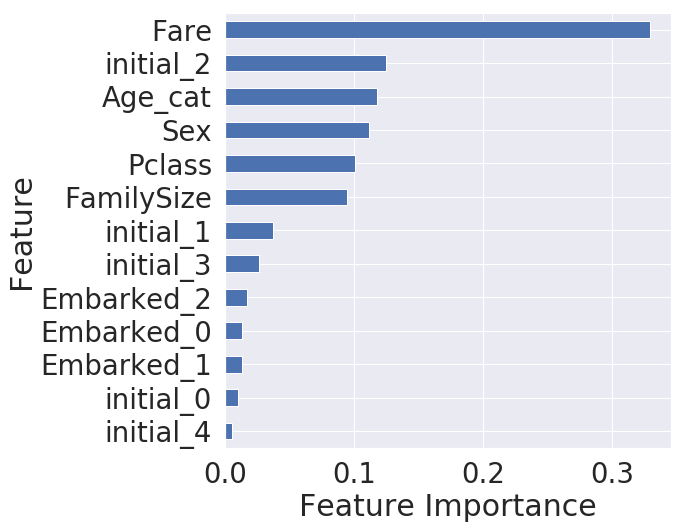

In [70]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [71]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [72]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
prediction = model.predict(x_test)

In [74]:
submission['Survived'] = prediction

In [75]:
submission.to_csv('./Titanic_submission.csv', index=False)